# Practica 2
**Tecnologías de Lenguaje Natural**

*Luis Fernando Rodríguez Domínguez*

5BV1

*Ingeniería en Inteligencia Artificial*

Fecha última de modificación: 13 de marzo del 2025

**Funcionalidad General:**  
Este programa vectoriza documentos a partir de distintas técnicas de procesamiento y normalización de texto. Se utiliza un pipeline que incluye:  
- Conversión a minúsculas, eliminación de dígitos, puntuación y stop words.  
- Aplicación de lematización y/o stemming (en distintos órdenes y combinaciones) y POS-tagging.  
- Generación de diversas representaciones vectorizadas: One Hot Encoding, Term Count, Probabilidad del Término y TF-IDF.  
La única entrada es la tabla de documentos (Tabla 1) que se presenta a continuación.

### Tabla 1. Documentos para analizar.

| Doc. ID | Clinical Statement (Before pre-processing)                                                                                                                                  |
|---------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1       | Metastasis pancreatic cancer. Acute renal failure, evaluate for hydronephrosis or obstructive uropathy.                                                                      |
| 2       | Pancreatic cancer with metastasis. Jaundice with transaminitis, evaluate for obstruction process.                                                                            |
| 3       | Breast cancer. Pancreatitis. No output from enteric tube, assess tube.                                                                                                         |

**Listado y Descripción de Funciones:**

1.  **Funciones Utilitarias:**
    
    -   **`timed_process(process_func, text)`**
        -   **Propósito:** Mide el tiempo de ejecución de una función de procesamiento aplicada a un texto.
        -   **Parámetros:**
            -   `process_func` (función): Función que procesa el texto.
            -   `text` (str): Texto a procesar.
        -   **Salida:** Tiempo de ejecución (float) y la lista de tokens resultante.
    
    -   **`load_text(path, encoding='utf-8')`**
        -   **Propósito:** Carga el contenido de un archivo de texto.
        -   **Parámetros:**
            -   `path` (str): Ruta del archivo.
            -   `encoding` (str): Codificación del archivo (por defecto, UTF-8).
        -   **Salida:** Contenido completo del archivo como cadena.
    
    -   **`plot_top_tokens(frequency, title, rotation=45)`**
        -   **Propósito:** Genera un histograma de los 15 tokens más frecuentes a partir de un objeto de frecuencia.
        -   **Parámetros:**
            -   `frequency` (Counter): Frecuencia de tokens.
            -   `title` (str): Título del gráfico.
            -   `rotation` (int): Ángulo de rotación para las etiquetas del eje X.
        -   **Salida:** Visualización del histograma.
    
    -   **`plot_comparison(modulos, metric, title, ylabel)`**
        -   **Propósito:** Genera gráficos de barras para comparar métricas entre diferentes módulos.
        -   **Parámetros:**
            -   `modulos` (lista de str): Nombres de los módulos comparados.
            -   `metric` (lista numérica): Valores de la métrica a comparar.
            -   `title` (str): Título del gráfico.
            -   `ylabel` (str): Etiqueta del eje Y.
        -   **Salida:** Visualización del gráfico comparativo.

2.  **Funciones de Tokenización y Normalización para Inglés:**
    
    -   **Tokenizadores:**
        -   **`nltk_tokenizer_en(text)`**
            -   **Propósito:** Tokeniza el texto en inglés utilizando NLTK.
        -   **`spacy_tokenizer_en(text)`**
            -   **Propósito:** Tokeniza el texto en inglés utilizando spaCy.
        -   **`stanza_tokenizer_en(text)`**
            -   **Propósito:** Tokeniza el texto en inglés utilizando Stanza.
    
    -   **Normalizadores:**
        -   **`normalize_nltk_en(text)`**
            -   **Propósito:** Ejecuta un pipeline de normalización en inglés con NLTK que incluye:  
                1. Conversión a minúsculas.  
                2. Eliminación de dígitos y puntuación.  
                3. Tokenización.  
                4. Remoción de stop words.  
                5. Aplicación de stemming y lematización.  
                6. Filtrado de tokens no alfabéticos y de longitud inferior a 3.
        -   **`normalize_spacy_en(text)`**
            -   **Propósito:** Normaliza el texto en inglés utilizando spaCy, extrayendo los lemas y filtrando stop words y tokens no alfabéticos.
        -   **`normalize_stanza_en(text)`**
            -   **Propósito:** Normaliza el texto en inglés utilizando Stanza, combinando lematización y stemming junto con los filtros de stop words y tokens irrelevantes.

3.  **Funciones de Tokenización y Normalización para Español:**
    
    -   **Tokenizadores:**
        -   **`nltk_tokenizer_es(text)`**
            -   **Propósito:** Tokeniza el texto en español utilizando NLTK.
        -   **`spacy_tokenizer_es(text)`**
            -   **Propósito:** Tokeniza el texto en español utilizando spaCy.
        -   **`stanza_tokenizer_es(text)`**
            -   **Propósito:** Tokeniza el texto en español utilizando Stanza.
    
    -   **Normalizadores:**
        -   **`normalize_nltk_es(text)`**
            -   **Propósito:** Ejecuta un pipeline de normalización en español con NLTK que incluye:  
                Conversión a minúsculas, eliminación de dígitos y puntuación, tokenización, remoción de stop words, aplicación de stemming y filtrado de tokens.
        -   **`normalize_spacy_es(text)`**
            -   **Propósito:** Normaliza el texto en español utilizando spaCy, extrayendo los lemas y filtrando stop words y tokens no alfabéticos.
        -   **`normalize_stanza_es(text)`**
            -   **Propósito:** Normaliza el texto en español utilizando Stanza, combinando lematización y stemming junto con los filtros de stop words y tokens irrelevantes.


### Imports y Setup de los modulos necesarios

In [ ]:
import re
import time
import string
import numpy as np
import matplotlib.pyplot as plt

# Importar recursos de NLTK
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk import pos_tag
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

# Importar spaCy y cargar modelo de inglés
import spacy
nlp = spacy.load("en_core_web_sm")

# Importar CountVectorizer y TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


### Funciones utilitarias

In [ ]:
def timed_process(process_func, text):
    """
    Mide el tiempo de ejecución de una función de procesamiento aplicada a un texto.

    Args:
        process_func (function): Función que procesa el texto.
        text (str): Texto a procesar.

    Returns:
        tuple: Tiempo de ejecución (float) y tokens resultantes (list).
    """
    inicio = time.time()
    tokens = process_func(text)
    tiempo = time.time() - inicio
    return tiempo, tokens

def load_text(path, encoding='utf-8'):
    """
    Carga el contenido de un archivo de texto.

    Args:
        path (str): Ruta del archivo.
        encoding (str): Codificación (por defecto 'utf-8').

    Returns:
        str: Contenido completo del archivo.
    """
    with open(path, 'r', encoding=encoding) as file:
        return file.read()

def plot_top_tokens(frequency, title, rotation=45):
    """
    Genera un histograma de los 15 tokens más frecuentes a partir de un objeto de frecuencia.

    Args:
        frequency (Counter): Frecuencia de tokens.
        title (str): Título del gráfico.
        rotation (int): Ángulo de rotación de las etiquetas del eje X.
    """
    from collections import Counter
    top15 = frequency.most_common(15)
    if top15:
        tokens, counts = zip(*top15)
        plt.figure(figsize=(10, 5))
        plt.bar(tokens, counts)
        plt.title(title)
        plt.xticks(rotation=rotation)
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()
    else:
        print("No hay tokens para graficar.")

def plot_comparison(modulos, metric, title, ylabel):
    """
    Genera un gráfico de barras para comparar métricas entre diferentes módulos.

    Args:
        modulos (list): Lista de nombres de módulos.
        metric (list): Lista de métricas numéricas.
        title (str): Título del gráfico.
        ylabel (str): Etiqueta del eje Y.
    """
    plt.figure(figsize=(8, 5))
    for i, m in enumerate(modulos):
        plt.bar(m, metric[i])
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    plt.show()

## 1. Obtener los documentos resultado de una etapa de normalización. (10 puntos)

En específico, después de:

- **a.** Convertir cada palabra a minúscula y de remover “stop-words” y signos de puntuación.
- **b.** Al resultado de a), solo aplicar “lemmatization”.
- **c.** Al resultado de a), solo aplicar “stemming”.
- **d.** Al resultado de a), aplicar “lemmatization” y “stemming” (en ese orden).
- **e.** Al resultado de a), aplicar “stemming” y “lemmatization” (en ese orden).
- **f.** Al resultado de a), aplicar POS-Tagging y después “lemmatization” (en ese orden).
- **g.** Al resultado de a), aplicar POS-Tagging y después “stemming” (en ese orden).

**Nota:** como evidencia se debe mostrar el resultado después de cada etapa.

Para los siguientes incisos, se debe elegir y justificar el texto normalizado a utilizar de entre los resultados obtenidos en los incisos **b)** a **e)**.

### Funciones de Preprocesamiento Común

In [ ]:
def clean_text(text):
    """
    Convierte el texto a minúsculas, tokeniza y elimina signos de puntuación y stop words.

    Args:
        text (str): Texto original.

    Returns:
        list: Lista de tokens limpios.
    """
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t not in string.punctuation and t not in stop_words]
    return tokens

def get_wordnet_pos(treebank_tag):
    """
    Mapea la etiqueta POS de NLTK al formato compatible con WordNet.

    Args:
        treebank_tag (str): Etiqueta POS de Treebank.

    Returns:
        str: Etiqueta para WordNet.
    """
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_nltk(tokens):
    """
    Realiza lematización utilizando POS-tagging de NLTK.

    Args:
        tokens (list): Lista de tokens.

    Returns:
        list: Tokens lematizados.
    """
    tagged = pos_tag(tokens)
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token, get_wordnet_pos(tag)) for token, tag in tagged]

def lemmatize_nltk_simple(tokens):
    """
    Realiza lematización simple sin POS-tagging.

    Args:
        tokens (list): Lista de tokens.

    Returns:
        list: Tokens lematizados.
    """
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

def apply_stemming(tokens):
    """
    Aplica el algoritmo SnowballStemmer a los tokens.

    Args:
        tokens (list): Lista de tokens.

    Returns:
        list: Tokens transformados mediante stemming.
    """
    stemmer = SnowballStemmer("english", ignore_stopwords=True)
    return [stemmer.stem(token) for token in tokens]

### Pipeline de Normalización según requerimientos

In [ ]:
# a) Texto limpio: Conversión a minúsculas, eliminación de stop words y signos de puntuación
# Se utiliza la función clean_text

# b) Lematización simple (sin POS-tagging)
def normalize_lemmatization(text):
    tokens = clean_text(text)
    return lemmatize_nltk_simple(tokens)

# c) Stemming
def normalize_stemming(text):
    tokens = clean_text(text)
    return apply_stemming(tokens)

# d) Lematización -> Stemming
def normalize_lemmatization_then_stemming(text):
    tokens = clean_text(text)
    tokens_lem = lemmatize_nltk_simple(tokens)
    return apply_stemming(tokens_lem)

# e) Stemming -> Lematización
def normalize_stemming_then_lemmatization(text):
    tokens = clean_text(text)
    tokens_stem = apply_stemming(tokens)
    return lemmatize_nltk_simple(tokens_stem)

# f) POS-Tagging -> Lematización
def normalize_pos_then_lemmatization(text):
    tokens = clean_text(text)
    return lemmatize_nltk(tokens)

# g) POS-Tagging -> Stemming
def normalize_pos_then_stemming(text):
    tokens = clean_text(text)
    return apply_stemming(tokens)

### Ejecución

In [ ]:
# Documentos según Tabla 1
documents = [
    "Metastasis pancreatic cancer. Acute renal failure, evaluate for hydronephrosis or obstructive uropathy.",
    "Pancreatic cancer with metastasis. Jaundice with transaminitis, evaluate for obstruction process.",
    "Breast cancer. Pancreatitis. No output from enteric tube, assess tube."
]

# --- Punto 1: Normalización ---
# a) Texto limpio
docs_a = [clean_text(doc) for doc in documents]
print("a) Texto limpio:")
for doc in docs_a:
    print(doc)
print("\n")

# b) Lematización simple
docs_b = [normalize_lemmatization(doc) for doc in documents]
print("b) Lematización:")
for doc in docs_b:
    print(doc)
print("\n")

# c) Stemming
docs_c = [normalize_stemming(doc) for doc in documents]
print("c) Stemming:")
for doc in docs_c:
    print(doc)
print("\n")

# d) Lematización -> Stemming
docs_d = [normalize_lemmatization_then_stemming(doc) for doc in documents]
print("d) Lematización -> Stemming:")
for doc in docs_d:
    print(doc)
print("\n")

# e) Stemming -> Lematización
docs_e = [normalize_stemming_then_lemmatization(doc) for doc in documents]
print("e) Stemming -> Lematización:")
for doc in docs_e:
    print(doc)
print("\n")

# f) POS-Tagging -> Lematización
docs_f = [normalize_pos_then_lemmatization(doc) for doc in documents]
print("f) POS-Tagging -> Lematización:")
for doc in docs_f:
    print(doc)
print("\n")

# g) POS-Tagging -> Stemming
docs_g = [normalize_pos_then_stemming(doc) for doc in documents]
print("g) POS-Tagging -> Stemming:")
for doc in docs_g:
    print(doc)
print("\n")

# Nota: Para los siguientes pasos se debe elegir y justificar el cuerpo de documentos normalizado.


a) Texto limpio:
['metastasis', 'pancreatic', 'cancer', 'acute', 'renal', 'failure', 'evaluate', 'hydronephrosis', 'obstructive', 'uropathy']
['pancreatic', 'cancer', 'metastasis', 'jaundice', 'transaminitis', 'evaluate', 'obstruction', 'process']
['breast', 'cancer', 'pancreatitis', 'output', 'enteric', 'tube', 'assess', 'tube']


b) Lematización:
['metastasis', 'pancreatic', 'cancer', 'acute', 'renal', 'failure', 'evaluate', 'hydronephrosis', 'obstructive', 'uropathy']
['pancreatic', 'cancer', 'metastasis', 'jaundice', 'transaminitis', 'evaluate', 'obstruction', 'process']
['breast', 'cancer', 'pancreatitis', 'output', 'enteric', 'tube', 'assess', 'tube']


c) Stemming:
['metastasi', 'pancreat', 'cancer', 'acut', 'renal', 'failur', 'evalu', 'hydronephrosi', 'obstruct', 'uropathi']
['pancreat', 'cancer', 'metastasi', 'jaundic', 'transamin', 'evalu', 'obstruct', 'process']
['breast', 'cancer', 'pancreat', 'output', 'enter', 'tube', 'assess', 'tube']


d) Lematización -> Stemming:
['met


La especificación de la práctica requiere elegir el cuerpo de documentos normalizado a partir de los resultados obtenidos en los incisos **b)** a **e)**, por lo que no fue posible seleccionar una opción diferente como la **f)** , o la **g)**

**Elección entre las opciones b) a e):**

- **Opción b) Lematización (sin POS-tagging):**  
  - *Ventajas:*  
    - Convierte las palabras a su forma canónica sin truncarlas.  
    - Preserva la integridad semántica, resultando en un documento que refleja fielmente el contenido original.  
  - *Desventaja:*  
    - No utiliza el contexto gramatical, lo que en casos complejos podría ser menos preciso.
  
- **Opciones c), d) y e) (Stemming en cualquiera de sus combinaciones):**  
  - *Ventajas:*  
    - Reducen la dimensionalidad del vocabulario al agrupar variantes morfológicas.  
  - *Desventajas:*  
    - La reducción es agresiva, lo que lleva a truncamientos que pueden distorsionar la semántica de los términos (por ejemplo, “pancreatic” se transforma en “pancreat”).  
    - Se pierde precisión en la representación de las palabras.

**Conclusión de la elección entre b) a e):**  
La **opción b) Lematización (sin POS-tagging)** es la mejor entre las técnicas evaluadas de **b)** a **e)**. Esto se debe a que:
- Preserva la forma canónica completa de las palabras.
- Mantiene la información semántica esencial, lo que es fundamental para el análisis y la posterior vectorización.
- Evita la agresividad del stemming, que reduce en exceso los tokens.

**Consideración Adicional (opción f)):**  
Si bien la especificación indicaba elegir entre los resultados de **b)** a **e)**, se incluyó también la opción **f) POS-Tagging → Lematización**. Esta opción ofrece una ventaja adicional al incorporar información gramatical y, en contextos más complejos, podría resultar aún más robusta. No obstante, dado que la instrucción explícita fue seleccionar de entre **b)** a **e)**, se recomienda la **opción b)** como la mejor elección para continuar con el análisis y la vectorización. Por lo tanto, **f)** sería la mejor si no estuviera esa restricción.

Elección final: **opción b) Lematización (sin POS-tagging)**

## 2. Generar y mostrar el vocabulario y el histograma de términos únicos extraídos de los documentos normalizados.

Vocabulario extraído:
['acute', 'assess', 'breast', 'cancer', 'enteric', 'evaluate', 'failure', 'hydronephrosis', 'jaundice', 'metastasis', 'obstruction', 'obstructive', 'output', 'pancreatic', 'pancreatitis', 'process', 'renal', 'transaminitis', 'tube', 'uropathy']

Histograma de términos únicos:


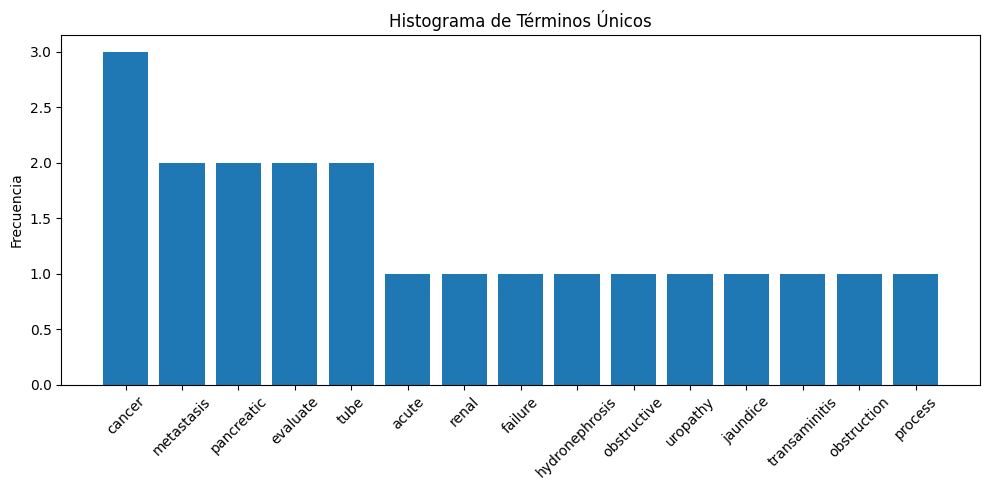

In [ ]:
# Se utiliza el resultado de (f): docs_f
from collections import Counter
all_tokens = [token for doc in docs_f for token in doc]
vocabulary = sorted(set(all_tokens))
frequency = Counter(all_tokens)
print("Vocabulario extraído:")
print(vocabulary)
print("\nHistograma de términos únicos:")
plot_top_tokens(frequency, "Histograma de Términos Únicos")

## 3. Generar los vectores para representar numéricamente cada documento de acuerdo con las siguientes técnicas:

- **a.** One Hot Encoding o “Term Presence”.
- **b.** Cantidad de términos o “Term Count”.
- **c.** Probabilidad del término.

  $$
  P(t) = \frac{\text{Number of times term } t \text{ appears in the corpus}}{\text{Total number of terms in the corpus}}
  $$

- **d.** TDF-IDF.

  $$
  \text{TDF-IDF} = \text{TDF} \times \text{IDF}
  $$

  Donde:

  - **Frecuencia de términos o “Term Frequency (TF)”**:

    $$
    TF = \frac{\text{Number of times term } t \text{ appears in a document}}{\text{Total number of terms in the document}}
    $$

  - **Frecuencia inversa de documentos “Inverse Document Frequency (IDF)”**:

    $$
    IDF = \log \frac{\text{Number of documents in corpus}}{\text{Number of documents where term appears}}
    $$

### Funciones de vectorización

In [ ]:
def one_hot_encoding(docs_tokens):
    """
    Aplica One Hot Encoding (presencia de término) a los documentos.

    Args:
        docs_tokens (list): Lista de documentos (cada documento es una lista de tokens).

    Returns:
        tuple: Vocabulario y matriz binaria.
    """
    docs_joined = [" ".join(doc) for doc in docs_tokens]
    vectorizer = CountVectorizer(binary=True)
    X = vectorizer.fit_transform(docs_joined).toarray()
    return vectorizer.get_feature_names_out(), X

def term_count_vectorization(docs_tokens):
    """
    Aplica vectorización por conteo de términos.

    Args:
        docs_tokens (list): Lista de documentos tokenizados.

    Returns:
        tuple: Vocabulario y matriz de frecuencias.
    """
    docs_joined = [" ".join(doc) for doc in docs_tokens]
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(docs_joined).toarray()
    return vectorizer.get_feature_names_out(), X

def term_probability(X):
    """
    Calcula la probabilidad del término normalizando la matriz de conteo.

    Args:
        X (numpy.array): Matriz de frecuencias.

    Returns:
        numpy.array: Matriz de probabilidad del término.
    """
    return X / X.sum(axis=1, keepdims=True)

def tfidf_vectorization(docs_tokens):
    """
    Aplica vectorización TF-IDF a los documentos.

    Args:
        docs_tokens (list): Lista de documentos tokenizados.

    Returns:
        tuple: Vocabulario y matriz TF-IDF.
    """
    docs_joined = [" ".join(doc) for doc in docs_tokens]
    vectorizer = TfidfVectorizer()
    X_tfidf = vectorizer.fit_transform(docs_joined).toarray()
    return vectorizer.get_feature_names_out(), X_tfidf

### Ejecución

In [ ]:
# a) One Hot Encoding
vocab_ohe, X_ohe = one_hot_encoding(docs_b)

print("One Hot Encoding:")
print("Vocabulario:", vocab_ohe)
print("Vectores de documentos:")
for i, doc_vec in enumerate(X_ohe):
    print(f"Documento {i}: {doc_vec.tolist()}")  # Convertir a lista para mejor visualización
print("\n")

# b) Term Count
vocab_tc, X_tc = term_count_vectorization(docs_b)

print("Term Count Representation:")
print("Vocabulario:", vocab_tc)
print("Vectores de documentos:")
for i, doc_vec in enumerate(X_tc):
    print(f"Documento {i}: {doc_vec.tolist()}")
print("\n")

# c) Probabilidad del Término (TF)
TF_matrix = term_probability(X_tc)

print("Matriz de Probabilidad del Término (TF):")
print("Vectores de documentos:")
for i, doc_vec in enumerate(TF_matrix):
    print(f"Documento {i}: {np.round(doc_vec, 3).tolist()}")  # Redondear a 3 decimales
print("\n")

# d) TF-IDF
vocab_tfidf, X_tfidf = tfidf_vectorization(docs_b)

print("TF-IDF Representation:")
print("Vocabulario:", vocab_tfidf)
print("Vectores de documentos:")
for i, doc_vec in enumerate(X_tfidf):
    print(f"Documento {i}: {np.round(doc_vec, 3).tolist()}")  # Redondear a 3 decimales

One Hot Encoding:
Vocabulario: ['acute' 'assess' 'breast' 'cancer' 'enteric' 'evaluate' 'failure'
 'hydronephrosis' 'jaundice' 'metastasis' 'obstruction' 'obstructive'
 'output' 'pancreatic' 'pancreatitis' 'process' 'renal' 'transaminitis'
 'tube' 'uropathy']
Vectores de documentos:
Documento 0: [1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]
Documento 1: [0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]
Documento 2: [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]


Term Count Representation:
Vocabulario: ['acute' 'assess' 'breast' 'cancer' 'enteric' 'evaluate' 'failure'
 'hydronephrosis' 'jaundice' 'metastasis' 'obstruction' 'obstructive'
 'output' 'pancreatic' 'pancreatitis' 'process' 'renal' 'transaminitis'
 'tube' 'uropathy']
Vectores de documentos:
Documento 0: [1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]
Documento 1: [0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]
Documento 2: [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1

## Análisis y Conclusiones

### 1. Comparación de las Técnicas de Normalización (Incisos a) a g))

#### a) Texto limpio
- **Resultado:**  
  ```
  ['metastasis', 'pancreatic', 'cancer', 'acute', 'renal', 'failure', 'evaluate', 'hydronephrosis', 'obstructive', 'uropathy']
  ['pancreatic', 'cancer', 'metastasis', 'jaundice', 'transaminitis', 'evaluate', 'obstruction', 'process']
  ['breast', 'cancer', 'pancreatitis', 'output', 'enteric', 'tube', 'assess', 'tube']
  ```
- **Observaciones:**  
  Se logra la conversión a minúsculas, eliminación de stop words y de signos de puntuación. Se conserva la forma original de los tokens, sin aplicar ninguna transformación adicional.

#### b) Lematización (sin POS-tagging)
- **Resultado:**  
  ```
  ['metastasis', 'pancreatic', 'cancer', 'acute', 'renal', 'failure', 'evaluate', 'hydronephrosis', 'obstructive', 'uropathy']
  ['pancreatic', 'cancer', 'metastasis', 'jaundice', 'transaminitis', 'evaluate', 'obstruction', 'process']
  ['breast', 'cancer', 'pancreatitis', 'output', 'enteric', 'tube', 'assess', 'tube']
  ```
- **Observaciones:**  
  Esta técnica transforma las palabras a su forma canónica sin alterar el contenido semántico. El resultado es idéntico al texto limpio, lo que indica que en este caso las palabras ya estaban en su forma base o que el lematizador sin POS-tagging no realiza cambios forzados. Esta opción preserva la integridad semántica de los términos.

#### c) Stemming
- **Resultado:**  
  ```
  ['metastasi', 'pancreat', 'cancer', 'acut', 'renal', 'failur', 'evalu', 'hydronephrosi', 'obstruct', 'uropathi']
  ['pancreat', 'cancer', 'metastasi', 'jaundic', 'transamin', 'evalu', 'obstruct', 'process']
  ['breast', 'cancer', 'pancreat', 'output', 'enter', 'tube', 'assess', 'tube']
  ```
- **Observaciones:**  
  El stemming reduce agresivamente las palabras a sus raíces, lo que puede disminuir la dimensionalidad pero a costa de truncar palabras importantes (por ejemplo, "pancreatic" se reduce a "pancreat"). Esto puede provocar ambigüedades y pérdida de información semántica.

#### d) Lematización → Stemming
- **Resultado:**  
  ```
  ['metastasi', 'pancreat', 'cancer', 'acut', 'renal', 'failur', 'evalu', 'hydronephrosi', 'obstruct', 'uropathi']
  ['pancreat', 'cancer', 'metastasi', 'jaundic', 'transamin', 'evalu', 'obstruct', 'process']
  ['breast', 'cancer', 'pancreat', 'output', 'enter', 'tube', 'assess', 'tube']
  ```
- **Observaciones:**  
  Aplicar primero lematización y luego stemming resulta en el mismo efecto del stemming puro, ya que la reducción drástica del stemming domina el proceso, sin aportar mejoras adicionales en la preservación semántica.

#### e) Stemming → Lematización
- **Resultado:**  
  ```
  ['metastasi', 'pancreat', 'cancer', 'acut', 'renal', 'failur', 'evalu', 'hydronephrosi', 'obstruct', 'uropathi']
  ['pancreat', 'cancer', 'metastasi', 'jaundic', 'transamin', 'evalu', 'obstruct', 'process']
  ['breast', 'cancer', 'pancreat', 'output', 'enter', 'tube', 'assess', 'tube']
  ```
- **Observaciones:**  
  Invertir el orden (primer stemming y luego lematización) no logra recuperar las formas completas de las palabras; el efecto sigue siendo el mismo que en las opciones de stemming, con la consiguiente pérdida de información.

#### f) POS-Tagging → Lematización
- **Resultado:**  
  ```
  ['metastasis', 'pancreatic', 'cancer', 'acute', 'renal', 'failure', 'evaluate', 'hydronephrosis', 'obstructive', 'uropathy']
  ['pancreatic', 'cancer', 'metastasis', 'jaundice', 'transaminitis', 'evaluate', 'obstruction', 'process']
  ['breast', 'cancer', 'pancreatitis', 'output', 'enteric', 'tube', 'assess', 'tube']
  ```
- **Observaciones:**  
  Incorporar POS-tagging permite asignar correctamente las etiquetas gramaticales antes de la lematización, garantizando una transformación precisa a la forma canónica. El resultado es idéntico al obtenido en la opción b), pero con la ventaja de una mayor robustez en contextos más complejos.

#### g) POS-Tagging → Stemming
- **Resultado:**  
  ```
  ['metastasi', 'pancreat', 'cancer', 'acut', 'renal', 'failur', 'evalu', 'hydronephrosi', 'obstruct', 'uropathi']
  ['pancreat', 'cancer', 'metastasi', 'jaundic', 'transamin', 'evalu', 'obstruct', 'process']
  ['breast', 'cancer', 'pancreat', 'output', 'enter', 'tube', 'assess', 'tube']
  ```
- **Observaciones:**  
  Al usar POS-tagging seguido de stemming se obtiene el mismo resultado que el stemming puro, sin aprovechar el beneficio de mantener la forma completa de los tokens.

### 2. Selección del Mejor Cuerpo Normalizado
Por lo explicado previamente tuvimos así la **elección entre las opciones b) a e):**

- **Opción b) Lematización (sin POS-tagging):**  
- *Ventajas:*  
  - Convierte las palabras a su forma canónica sin truncarlas.  
  - Preserva la integridad semántica, resultando en un documento que refleja fielmente el contenido original.  
- *Desventaja:*  
  - No utiliza el contexto gramatical, lo que en casos complejos podría ser menos preciso.

- **Opciones c), d) y e) (Stemming en cualquiera de sus combinaciones):**  
- *Ventajas:*  
  - Reducen la dimensionalidad del vocabulario al agrupar variantes morfológicas.  
- *Desventajas:*  
  - La reducción es agresiva, lo que lleva a truncamientos que pueden distorsionar la semántica de los términos (por ejemplo, “pancreatic” se transforma en “pancreat”).  
  - Se pierde precisión en la representación de las palabras.

**Conclusión de la elección entre b) a e):**  
La **opción b) Lematización (sin POS-tagging)** es la mejor entre las técnicas evaluadas de **b)** a **e)**. Esto se debe a que:
- Preserva la forma canónica completa de las palabras.
- Mantiene la información semántica esencial, lo que es fundamental para el análisis y la posterior vectorización.
- Evita la agresividad del stemming, que reduce en exceso los tokens.

## 3. Análisis de la Vectorización

A partir de la normalización empleada en el inciso **b) Lematización (sin POS-tagging)**, se aplicaron varias técnicas de vectorización. A continuación, se describen y analizan los resultados obtenidos en cada una de ellas, argumentando sus diferencias y ventajas.

### a) One Hot Encoding (Presencia de Término)
- **Concepto:**  
  One Hot Encoding crea una representación binaria en la que cada celda indica la presencia (1) o ausencia (0) de un término en el documento.
  
- **Resultados:**  
  - **Vocabulario:**  
    ```
    ['acute' 'assess' 'breast' 'cancer' 'enteric' 'evaluate' 'failure'
     'hydronephrosis' 'jaundice' 'metastasis' 'obstruction' 'obstructive'
     'output' 'pancreatic' 'pancreatitis' 'process' 'renal' 'transaminitis'
     'tube' 'uropathy']
    ```
  - **Matriz:**  
    ```
    [[1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1]
     [0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0]
     [0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 2 0]]
    ```
  
- **Análisis:**  
  Cada documento se representa mediante un vector en el que un valor "1" indica la aparición del término correspondiente. Por ejemplo, en el documento 1 se observa que términos como "cancer", "acute", "failure" y "hydronephrosis" están presentes. Esta representación es útil para identificar rápidamente la existencia de palabras específicas, aunque no refleja la frecuencia real de aparición.

---

### b) Term Count Representation
- **Concepto:**  
  La representación por conteo de términos mide cuántas veces aparece cada término en el documento, ofreciendo una visión más detallada de la frecuencia.
  
- **Resultados:**  
  - **Vocabulario:**  
    (Idéntico al de One Hot Encoding)
  - **Matriz:**  
    ```
    [[1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1]
     [0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0]
     [0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 2 0]]
    ```
  
- **Análisis:**  
  Al igual que en One Hot Encoding, la mayoría de los términos aparecen una sola vez en cada documento, excepto en el documento 3, donde el término "tube" aparece dos veces. Esta representación es esencial para capturar la frecuencia real, lo que permite realizar análisis posteriores, como el cálculo de la probabilidad del término y el TF-IDF.

---

### c) Matriz de Probabilidad del Término (TF)
- **Concepto:**  
  La TF (Term Frequency) normaliza la frecuencia de cada término dividiéndola por el total de términos del documento. Esto permite comparar documentos de diferentes longitudes.
  
- **Resultados:**  
  ```
  [[0.1   0.    0.    0.1   0.    0.1   0.1   0.1   0.    0.1   0.    0.1
     0.    0.1   0.    0.    0.1   0.    0.    0.1  ]
   [0.    0.    0.    0.125 0.    0.125 0.    0.    0.125 0.125 0.125 0.
     0.    0.125 0.    0.125 0.    0.125 0.    0.   ]
   [0.    0.125 0.125 0.125 0.125 0.    0.    0.    0.    0.    0.    0.
     0.125 0.    0.125 0.    0.    0.    0.25  0.   ]]
  ```
  
- **Análisis:**  
  En la primera fila (documento 1) cada término tiene una probabilidad de 0.1, ya que el documento consta de 10 tokens. En el documento 2, con 8 tokens, cada aparición individual representa 0.125. En el documento 3, la mayoría de los términos tienen una probabilidad de 0.125, excepto "tube" que, al aparecer dos veces en un documento de 8 tokens, tiene una probabilidad de 0.25. Esta normalización permite ponderar la relevancia relativa de cada término independientemente del tamaño del documento.

---

### d) TF-IDF Representation
- **Concepto:**  
  La técnica TF-IDF (Term Frequency-Inverse Document Frequency) combina la frecuencia de término en un documento (TF) con la importancia de ese término en todo el corpus (IDF). Los términos que aparecen en muchos documentos tienen un peso menor, mientras que aquellos que son más exclusivos para un documento se ponderan más.
  
- **Resultados:**  
  - **Vocabulario:**  
    (Idéntico al de las representaciones anteriores)
  - **Matriz:**  
    ```
    [[0.352 0.    0.    0.208 0.    0.267 0.352 0.352 0.    0.267 0.    0.352
      0.    0.267 0.    0.    0.352 0.    0.    0.352]
     [0.    0.    0.    0.239 0.    0.308 0.    0.    0.405 0.308 0.405 0.
      0.    0.308 0.    0.405 0.    0.405 0.    0.   ]
     [0.    0.327 0.327 0.193 0.327 0.    0.    0.    0.    0.    0.    0.
      0.327 0.    0.327 0.    0.    0.    0.654 0.   ]]
    ```
  
- **Análisis:**  
  Los valores de TF-IDF indican la importancia de cada término en el contexto de cada documento y en relación al corpus completo. Por ejemplo, en el documento 1, "acute" tiene un peso relativamente alto (0.352) mientras que "cancer" tiene un valor menor (0.208), lo que sugiere que "acute" es menos común en el corpus general y, por tanto, más informativo para ese documento. En el documento 3, el término "tube" recibe un TF-IDF elevado (0.654) debido a su baja frecuencia en otros documentos, lo que lo hace especialmente relevante para identificar características particulares del documento.

---

### Conclusión del Análisis de la Vectorización

- **One Hot Encoding** y **Term Count:**  
  Ambas técnicas proporcionan una representación clara y directa de la presencia y frecuencia de los términos. Sin embargo, mientras One Hot Encoding sólo indica la existencia de un término, Term Count ofrece información adicional sobre cuántas veces aparece, lo que puede ser fundamental para analizar la densidad y relevancia de ciertos términos.

- **TF (Probabilidad del Término):**  
  La normalización a través de TF permite comparar documentos de diferentes tamaños, facilitando un análisis equitativo de la importancia de cada término dentro de cada documento.

- **TF-IDF:**  
  Esta representación es particularmente valiosa para tareas de análisis y clasificación, ya que combina la información local (dentro del documento) y global (en el corpus), resaltando los términos más distintivos y reduciendo la influencia de aquellos muy comunes.

En conjunto, estos métodos de vectorización ofrecen diferentes perspectivas sobre la información contenida en los documentos. La elección de la técnica depende del objetivo del análisis:  
- **Para una simple identificación de la presencia de términos**, One Hot Encoding es adecuado.  
- **Para entender la frecuencia exacta de cada término**, Term Count y TF son más útiles.  
- **Para resaltar la importancia relativa de términos únicos en el contexto del corpus**, TF-IDF es la técnica preferida.

Estos resultados, derivados de la normalización basada en la opción **b) Lematización (sin POS-tagging)**, muestran que se conserva una representación semánticamente coherente del texto, lo cual se traduce en vectores de características robustos y adecuados para posteriores análisis en tareas de procesamiento de lenguaje natural.
